In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = "100"
lie_type = "random"

In [3]:
statuses = {0: "no endpoint blacklisted", 1: "one endpoint blacklisted", 2: "both endpoints blacklisted"}
colors = {"no endpoint blacklisted": "green", 
          "one endpoint blacklisted": "blue", 
          "both endpoints blacklisted": "red"}

In [4]:
data= pd.read_csv("data/percentage/test_"
                  +N+"_nodes_"+lie_type+".csv")[[
    "node_1","node_2","lie_percentage","nb_strikes_1","nb_strikes_2","threshold"]]

threshold = data["threshold"][0]

In [5]:
data

,node_1,node_2,lie_percentage,nb_strikes_1,nb_strikes_2,threshold
0,N0,N1,0.0,21327,20910,19800
1,N0,N2,0.0,21327,21144,19800
2,N0,N3,0.0,21327,21177,19800
3,N0,N4,0.0,21327,21639,19800
4,N0,N5,0.0,21327,21231,19800
5,N0,N6,0.0,21327,20982,19800
6,N0,N7,0.0,21327,21003,19800
7,N0,N8,0.0,21327,21126,19800
8,N0,N9,0.0,21327,20793,19800
9,N0,N10,0.0,21327,20988,19800


In [6]:
nb_strikes = data[["lie_percentage", "nb_strikes_1"]]\
    .groupby("nb_strikes_1")["lie_percentage"]\
    .apply(list)\
    .reset_index()["nb_strikes_1"]


In [7]:
#data['strike_quartiles'] = pd.qcut(data['nb_strikes_1'], 5)

/home/sabrina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


<Figure size 432x288 with 0 Axes>

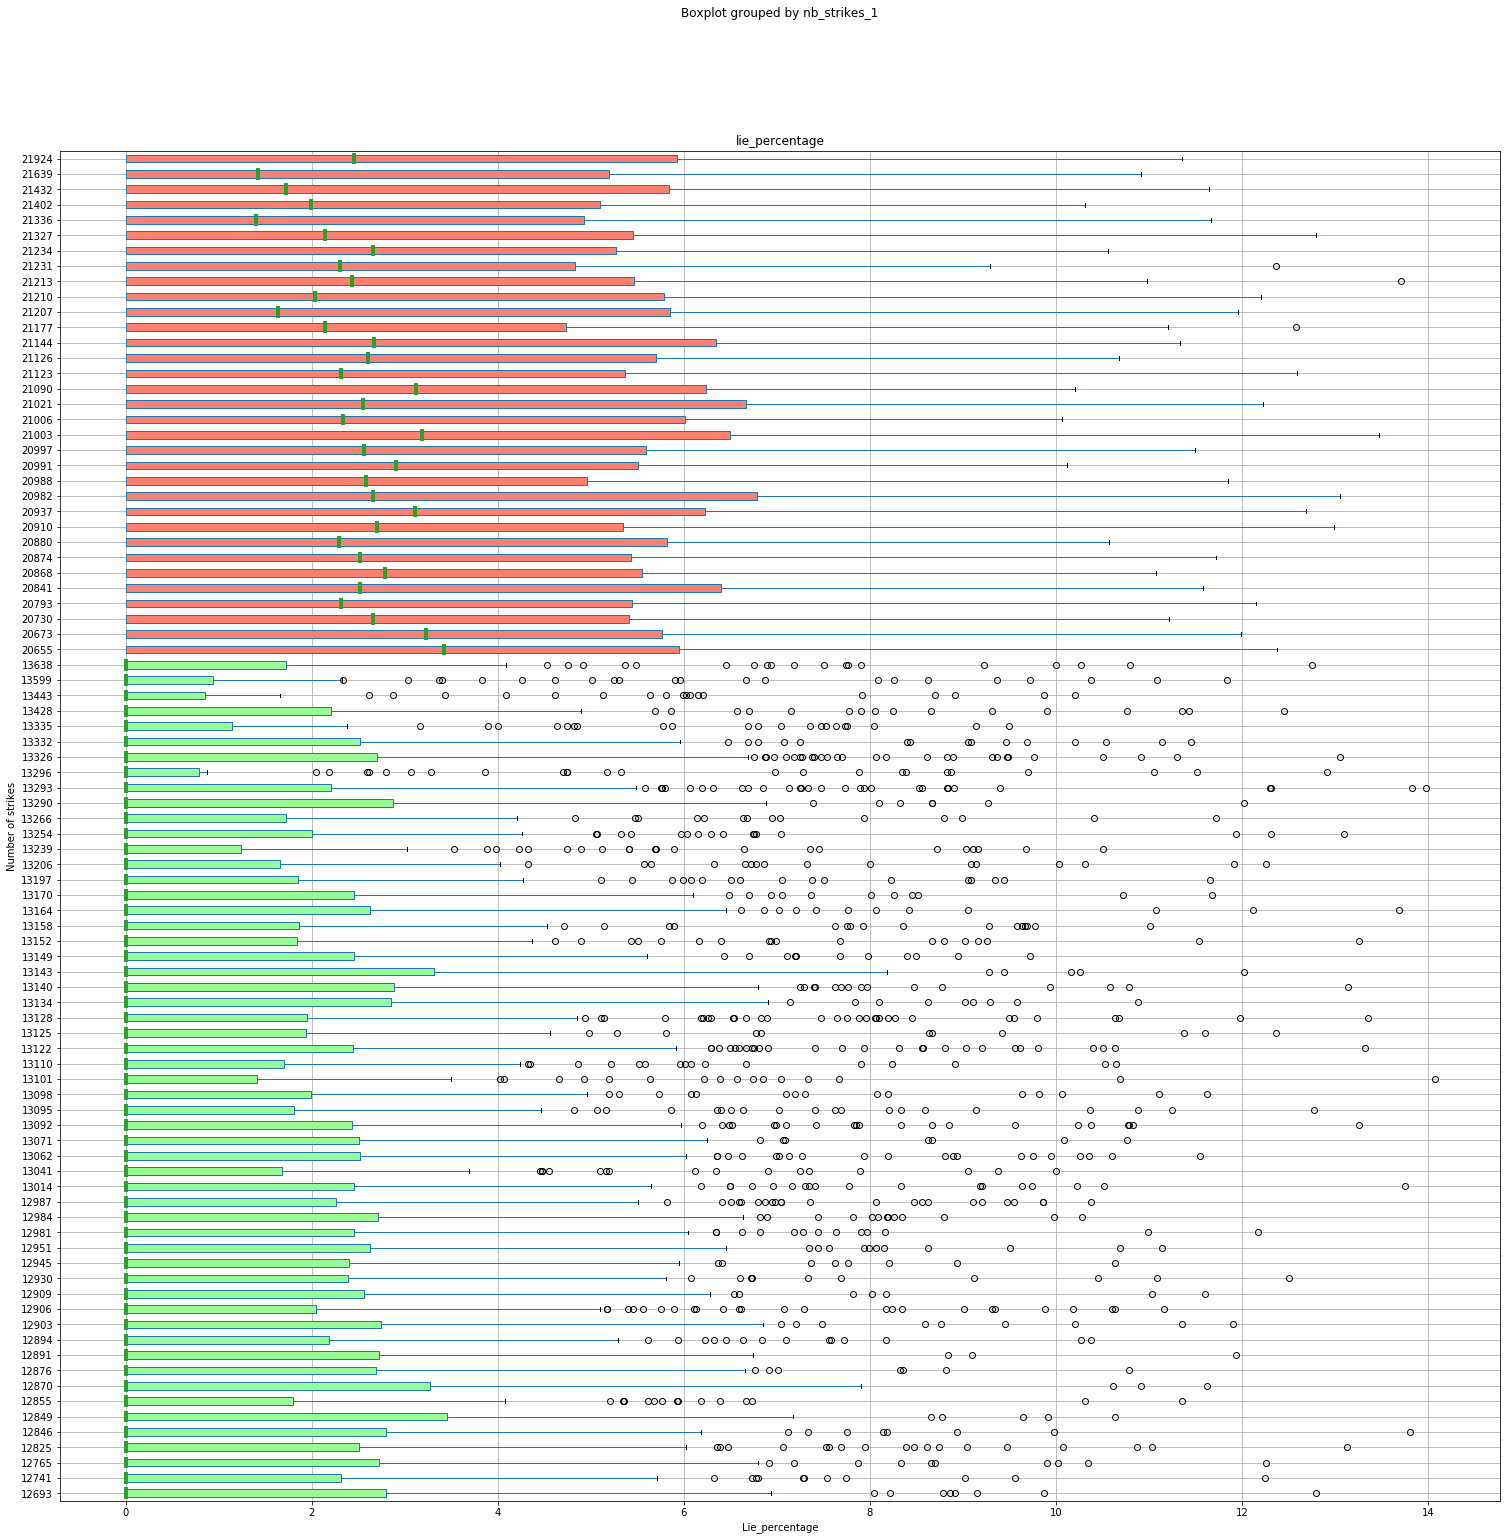

In [8]:
plt.figure()


medianprops = dict(linestyle='-', linewidth=4, color='blue')

bp = pd.DataFrame.boxplot( data,
    column="lie_percentage",
    by="nb_strikes_1", 
    figsize=(25, 25), 
    vert=False, 
    medianprops=medianprops,
    return_type='both', 
    patch_artist = True)
    
colors = ['salmon', 'palegreen']
for row_key, (ax,row) in bp.iteritems():

    ax.set_xlabel('Lie_percentage')
    ax.set_ylabel('Number of strikes')
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[nb_strikes[i] < threshold ])
        

#ax.set_yticks(np.arange(0, 100, step=500))

In [9]:
fig = ax.get_figure()


In [10]:
fig.savefig('graphs/percentage/'+N+'_nodes_' + lie_type+".png")